# Wrangle And Analyze Twitter Data

### Gathering Data

In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import os
import json
import re
from urllib.request import urlretrieve
%matplotlib inline

In [3]:
#Load data into twitter archive dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Downloading the file from the server programatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
urlretrieve(url,url.split('/')[-1])

('image-predictions.tsv', <http.client.HTTPMessage at 0x2333a063ba8>)

In [4]:
#LOad the data into image predictions dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
# Store OAuth authentication credentials in relevant variables
access_token = "324415503-vdIMpzkqDLy5wip7RUe86xVuSuf2VPWY6CG45ccT"
access_token_secret = "nSEBtOAoWKxU9TNspvPPsLcxPmWFna43F46Ed3P0UA2Y4"
consumer_key = "2GIvuIPULWgCRq7qCbXwWGqeM"
consumer_secret = "m9Sdrvk5GBvOxIOsZu8AHPFpoTyWPA0Qc3cTlMR9bjNZtgwpmk"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)

#api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

In [7]:
#Create a list of dictionaries with each tweet id, favorites and retweet count
df_list = []
e_list = []
tweet_id = twitter_archive['tweet_id']

for id in tweet_id:
    try:
        page = api.get_status(id)
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        day_time = pd.to_datetime(page['created_at'])
        df_list.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)})
    
    except Exception as e:
        e_list.append(id)

In [12]:
#Load the dataframe from list of dictionaries
tweet_info = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweet_count'])
tweet_info.to_csv('tweet_json.txt', encoding = 'utf-8', index = False)

In [6]:
#Load the dataframe from a text file
tweet_info = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

### Assessing Data

In [7]:
#Assess twitter archive dataframe visually
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
#Assess image predictions dataframe visually
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [9]:
#Assess twitter info dataframe visually
tweet_info

,tweet_id,favorites,retweet_count
0,892420643555336193,38912,8624
1,892177421306343426,33325,6337
2,891815181378084864,25101,4207
3,891689557279858688,42268,8745
4,891327558926688256,40427,9507
5,891087950875897856,20275,3150
6,890971913173991426,11891,2099
7,890729181411237888,65756,19117
8,890609185150312448,27854,4315
9,890240255349198849,32036,7503


In [10]:
#Asses twitter archive data programatically
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
#Finding the null values present in the expanded_urls column by performing programmatic assesment 
twitter_archive[twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [12]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
Sadie           8
the             8
Bailey          7
Buddy           7
an              7
Toby            7
Daisy           7
Rusty           6
Oscar           6
Milo            6
Dave            6
Scout           6
Jax             6
Bella           6
Koda            6
Leo             6
Stanley         6
Jack            6
Sammy           5
             ... 
Fiji            1
Billl           1
Dutch           1
Grizz           1
Ralph           1
Chesterson      1
Ronnie          1
Koko            1
Augie           1
Dallas          1
Snoop           1
Toffee          1
Kingsley        1
Arlo            1
Horace          1
Tanner          1
Ginger          1
Leonidas        1
Poppy           1
Joshwa          1
Yoda            1
Mike            1
Stephanus       1
Tess            1
Chuq      

In [14]:
#Assess image predictions data programatically
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
#assess twitter info data programatically
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id         2345 non-null int64
favorites        2345 non-null int64
retweet_count    2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


### Quality Issues

#### `Twitter Archive` table
- Missing values present in the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls columns.
- timestamp column type is object instead of datetime.
- Some observations are retweets.
- name is sometimes not an actual name.
- Inaccurate values present in rating_numerator column(decimal values not extracted).

#### `Image Predictions` table
- Missing data only 2075 rows present instead of 2356.
- p1, p2, p3 columns have inconsistent capitalization(first letter capitalized for some). 

#### `Twitter Info` table
- Missing data only 2345 rows present instead of 2356.

### Tidiness Issues
- Three data frames `twitter_archive`, `image_predictions`, and `tweet_info` should be one (combined table) since all tables' entries are each describing one tweet.

#### `Twitter Archive` table
- one variable in four columns(doggo, floofer, pupper, and puppo).
- since we are not investigating the retweets so we does not require retweet columns.

### Cleaning Data

In [16]:
#create a copy of the dataframes before start cleaning
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_info_clean = tweet_info.copy()

#### Quality 

#### `Twitter Archive` 

**Missing values present in the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls columns.**

#### Define

since we are not investigating the retweets so we can remove the columns with retweets sice it is also a tidiness issue. We cannot fill the missing values in the in_reply_to_status_id, in_reply_to_user_id columns ore cannot also remove the entire observations with the missing values so we can delete both the columns since they have few non null values. Fill the expanded urls using the tweet id.

#### Code

In [17]:
#Remove the columns
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True)

In [18]:
#Fill the expanded urlsusing the tweet_id
def fill_urls(row):
    if pd.isnull(row['expanded_urls']):
        row['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(row['tweet_id'])
        return row
    else:
        return row

twitter_archive_clean = twitter_archive_clean.apply(fill_urls, axis = 1)

#### Test

In [19]:
#Check the columns present in the twitter_archive_clean dataframe
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [20]:
#Fill the expanded urls using the tweet id
twitter_archive_clean[twitter_archive_clean['expanded_urls'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Tidiness

**Three data frames twitter_archive, image_predictions, and tweet_info should be one (combined table) since all tables' entries are each describing one tweet.**

#### `Tweet Info` 
**Missing data only 2345 rows present instead of 2356.**

#### Define

We can address both the tidiness and quality issue by combining the tables. First we create new dataframe by merging data from tweet_info_clean into a twitter_archive_clean.

#### Code

In [21]:
#Merge the twitter_archive_clean and tweet_info_clean dataframe
twitter_tweets_info = pd.merge(twitter_archive_clean,tweet_info_clean, on = 'tweet_id')

#### Test

In [22]:
#Get the summary of the new dataframe
twitter_tweets_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 14 columns):
tweet_id              2345 non-null int64
timestamp             2345 non-null object
source                2345 non-null object
text                  2345 non-null object
expanded_urls         2345 non-null object
rating_numerator      2345 non-null int64
rating_denominator    2345 non-null int64
name                  2345 non-null object
doggo                 2345 non-null object
floofer               2345 non-null object
pupper                2345 non-null object
puppo                 2345 non-null object
favorites             2345 non-null int64
retweet_count         2345 non-null int64
dtypes: int64(5), object(9)
memory usage: 274.8+ KB


In [23]:
#Check the head of the new dataframe
twitter_tweets_info.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,38912,8624
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,33325,6337
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,25101,4207
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,42268,8745
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,40427,9507


#### `Image Predictions` 

**Missing data only 2075 rows present instead of 2356.**

#### Define

Next we merge the data from image_predictions_clean dataframe into the twitter_tweets_info dataframe.

#### Code

In [24]:
#Merge the dataframes
twitter_archive_master = pd.merge(twitter_tweets_info, image_predictions, on = 'tweet_id')

#### Test

In [25]:
#Find the summary of the new dataframe
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 25 columns):
tweet_id              2069 non-null int64
timestamp             2069 non-null object
source                2069 non-null object
text                  2069 non-null object
expanded_urls         2069 non-null object
rating_numerator      2069 non-null int64
rating_denominator    2069 non-null int64
name                  2069 non-null object
doggo                 2069 non-null object
floofer               2069 non-null object
pupper                2069 non-null object
puppo                 2069 non-null object
favorites             2069 non-null int64
retweet_count         2069 non-null int64
jpg_url               2069 non-null object
img_num               2069 non-null int64
p1                    2069 non-null object
p1_conf               2069 non-null float64
p1_dog                2069 non-null bool
p2                    2069 non-null object
p2_conf               2069 non-null floa

In [26]:
#Check the head of the final dataframe
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### `Twitter Archive` 
**one variable in four columns(doggo, floofer, pupper, and puppo).**

#### Define

We can address this tidiness issue by condensing the four columns into a newly created column which can also contain multiple dog stages separated by a comma and dropping the four columns from the master dataframe.

#### Code

In [27]:
#Create new column dog_stage
def dog_stage(row):
    stages = []
    if row['doggo'] == 'doggo':
        stages.append('doggo')
    if row['floofer'] == 'floofer':
        stages.append('floofer')
    if row['pupper'] == 'pupper':
        stages.append('pupper')
    if row['puppo'] == 'puppo':
        stages.append('puppo')
      
    if len(stages) < 1:
        row['dog_stage'] = 'None'
    else:
        row['dog_stage'] = ','.join(stages)
    return row

twitter_archive_master = twitter_archive_master.apply(dog_stage, axis = 1)

In [28]:
#Drop the doggo, floofer, pupper and puppo columns
twitter_archive_master.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)

#### Test

In [29]:
#Check whether the dog_stage has been added or not
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 22 columns):
tweet_id              2069 non-null int64
timestamp             2069 non-null object
source                2069 non-null object
text                  2069 non-null object
expanded_urls         2069 non-null object
rating_numerator      2069 non-null int64
rating_denominator    2069 non-null int64
name                  2069 non-null object
favorites             2069 non-null int64
retweet_count         2069 non-null int64
jpg_url               2069 non-null object
img_num               2069 non-null int64
p1                    2069 non-null object
p1_conf               2069 non-null float64
p1_dog                2069 non-null bool
p2                    2069 non-null object
p2_conf               2069 non-null float64
p2_dog                2069 non-null bool
p3                    2069 non-null object
p3_conf               2069 non-null float64
p3_dog                2069 non-null bool

#### `Twitter Archive`
**Timestamp column type is object instead of datetime.**

#### Define

Change the datatype of timestamp column from object to DateTime using to_datetime function.

#### Code

In [30]:
#Change the datatype of timestamp column
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master['timestamp'])

#### Test

In [31]:
#Find the summary of the master dataframe and check the datatype of timestamp column
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 22 columns):
tweet_id              2069 non-null int64
timestamp             2069 non-null datetime64[ns]
source                2069 non-null object
text                  2069 non-null object
expanded_urls         2069 non-null object
rating_numerator      2069 non-null int64
rating_denominator    2069 non-null int64
name                  2069 non-null object
favorites             2069 non-null int64
retweet_count         2069 non-null int64
jpg_url               2069 non-null object
img_num               2069 non-null int64
p1                    2069 non-null object
p1_conf               2069 non-null float64
p1_dog                2069 non-null bool
p2                    2069 non-null object
p2_conf               2069 non-null float64
p2_dog                2069 non-null bool
p3                    2069 non-null object
p3_conf               2069 non-null float64
p3_dog                2069 non-n

#### `Image Predictions`

**p1, p2, p3 columns have inconsistent capitalization(first letter capitalized for some).**

#### Define

convert p1, p2, p3 columns to lower case using str.lower() method

#### Code

In [32]:
#Converting columns to lowercase
twitter_archive_master['p1'] = twitter_archive_master['p1'].str.lower()
twitter_archive_master['p2'] = twitter_archive_master['p2'].str.lower()
twitter_archive_master['p3'] = twitter_archive_master['p3'].str.lower()

#### Test

In [33]:
#Check the content of the p1, p2, p3 columns
twitter_archive_master.loc[: , ['p1','p2','p3']].head(7)

,p1,p2,p3
0,orange,bagel,banana
1,chihuahua,pekinese,papillon
2,chihuahua,malamute,kelpie
3,paper_towel,labrador_retriever,spatula
4,basset,english_springer,german_short-haired_pointer
5,chesapeake_bay_retriever,irish_terrier,indian_elephant
6,appenzeller,border_collie,ice_lolly


#### `Twitter Archive`

** Some observations in the dataframe are retweets**
#### Define

Since we are not investigating the retweets we can remove them from our master datframe. We can subset our master dataframe by ignoring the retweets which start with RT @.

#### Code

In [34]:
#Find the retweets and remove them from master dataframe
retweets = twitter_archive_master['text'].str.match('^RT @')
twitter_archive_master = twitter_archive_master[~ retweets]

#### Test

In [35]:
#Check if there are any retweets in the master dataframe
twitter_archive_master['text'].str.match('^RT @').sum()

0

In [36]:
#Find the summary of the master dataframe after removing the retweets
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2068
Data columns (total 22 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
favorites             1994 non-null int64
retweet_count         1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-n

#### `Twitter Archive`

**Inaccurate values present in rating_numerator column(decimal values not extracted).**

#### Define

Some ratings for numerator were not extracted properly. Decimal values for the numerators were ignored. Use regular expressions to search and extract the decimal values from the text for the numerator.

#### Code

In [37]:
#Use regular expression to extract the decimal values from the text
def get_decimals(row):
    decimal_numerator = '(\d+\.\d+)\/(\d+)'
    matches = re.search(decimal_numerator,row['text'])
    if matches != None:
        row['rating_numerator'] = matches.group(1)
        row['rating_denominator'] = matches.group(2)
    return row

twitter_archive_master = twitter_archive_master.apply(get_decimals, axis = 1)

#### Test

In [38]:
#Check for rows with decimal values for the numerator column
def get_decimals(row):
    decimal_numerator = '(\d+\.\d+)\/(\d+)'
    matches = re.search(decimal_numerator,row['text'])
    if matches != None:
        print(row['rating_numerator'],row['rating_denominator'])
        print(row['text'])
        
    return row

twitter_archive_master.apply(get_decimals, axis = 1)

13.5 10
This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
9.75 10
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
11.27 10
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
11.26 10
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,38912,8624,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33325,6337,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25101,4207,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42268,8745,...,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,40427,9507,...,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,20275,3150,...,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,11891,2099,...,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,65756,19117,...,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,27854,4315,...,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,32036,7503,...,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True,doggo


#### `Twitter Archive`

**Name is sometimes not an actual name.**

#### Define

(NOTE: There are many non-names in the dataset, so only names that have "a" will be fixed for this data set)

Set "a" to "None" if no name given otherwise fix name

#### Code

In [39]:
#Change the names of the rows which have 'a' as a name
def replace_names(row):
    # Only try to replace name if it is 'a'
    if row['name'] == 'a':    
        #get text from row
        text = row['text']
        
        # get list of words from the text
        word_list = text.split()

        # defaults to no name
        name = 'None'

        # get name from 'named {}'
        if 'named' in word_list:
            # Get the next word after 'named'
            name_pos = word_list.index('named') + 1
            name = word_list[name_pos]

        # get name from 'name is {}'
        elif 'name is' in text:
            # Get the next word after 'name is' (skip 'is')
            name_pos = word_list.index('name') + 2
            name = word_list[name_pos]

        #only replace the 'name' column (with no period)
        row['name'] = name.replace('.','')
    
    # Return row whether updated or name
    return row
    

twitter_archive_master = twitter_archive_master.apply(replace_names, axis=1)

#### Test

In [40]:
#Check if there is any 'a' in names
'a' in twitter_archive_master['name']

False

### Store Data

**store the final and cleaned dataframe in to a csv file 'twitter_archive_master.csv'**

In [41]:
#Store data in a csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

In [42]:
#Load the data from the csv file
df_clean = pd.read_csv('twitter_archive_master.csv')

### Analysis and Visualization

#### Insight 1: Retweets vs Favorites

#### Define

what type of correlation exists between retweets and favorites? Which tweet has the most favourite dog and does this tweet also have the most number of retweets?

#### Code

In [43]:
#Correlation between retweets and favorites
df_clean[['retweet_count','favorites']].corr(method = 'pearson')

,retweet_count,favorites
retweet_count,1.000000,0.917442
favorites,0.917442,1.000000


So we can see that there exists a strong and positive correlation between the retweets and favorites. We can confirm this relationship by plotting a scatter plot among the retweets and favorites.

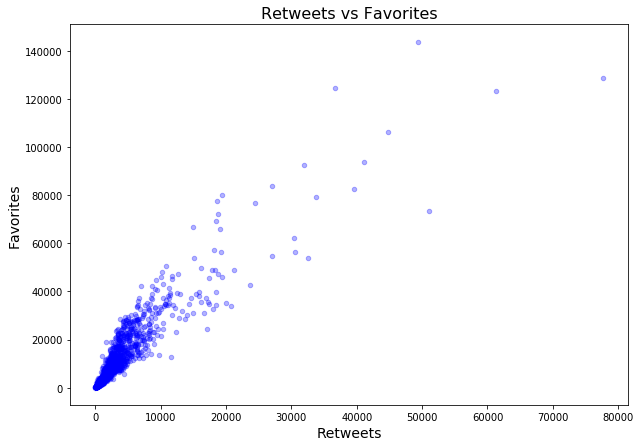

In [56]:
#Scatter Plot
df_clean.plot(kind = 'scatter', x = 'retweet_count', y = 'favorites', color = 'blue', alpha = 0.3, figsize = (10,7))
plt.xlabel('Retweets', fontsize = 14)
plt.ylabel('Favorites', fontsize = 14)
plt.title('Retweets vs Favorites', fontsize = 16);

In [45]:
#Maximum number of favourite
df_clean['favorites'].max()

143784

In [46]:
#Most number of Retweets
df_clean['retweet_count'].max()

77604

In [47]:
#Most favorite dog
df_clean.query('favorites==143784')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
309,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10,None,143784,49304,...,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True,puppo


#### Results

There exists a positive correlation between favorites and retweets. Tweet with the id `822872901745569793` has the dog that has been the most favorite but this tweet did not got the most number of retweets. This might be due to the people liked the picture of the dog the most but some might not have liked the caption in the tweet.

#### Insight 2: Most Common Dog Breeds

#### Define

which are the most common breeds? Are some breeds most common in tweets?

#### Code

In [48]:
#Create a  breed and breed confidence columns for the dataframe
def find_breed(row):
    if row['p1_dog'] == True:
        row['breed'] = row['p1']
        row['breed_conf'] = row['p1_conf']
        
    elif row['p2_dog'] == True:
        row['breed'] = row['p2']
        row['breed_conf'] = row['p2_conf']
        
    elif row['p3_dog'] == True:
        row['breed'] = row['p3']
        row['breed_conf'] = row['p3_conf']
        
    else:
        row['breed'] = 'unidentifiable'
        row['breed_conf'] = 0
    return row

df_clean = df_clean.apply(find_breed,axis = 1)

In [49]:
#show 25 most common dog breeds
df_clean['breed'].value_counts()[:25]

unidentifiable               308
golden_retriever             158
labrador_retriever           108
pembroke                      95
chihuahua                     91
pug                           62
toy_poodle                    51
chow                          48
pomeranian                    42
samoyed                       42
malamute                      33
chesapeake_bay_retriever      31
french_bulldog                31
cocker_spaniel                30
miniature_pinscher            25
eskimo_dog                    22
cardigan                      21
staffordshire_bullterrier     21
german_shepherd               21
beagle                        20
siberian_husky                20
shih-tzu                      20
maltese_dog                   19
shetland_sheepdog             19
rottweiler                    19
Name: breed, dtype: int64

`unidentifiable` is most common breed so we will keep this out of the plot and plot the top 12 common breeds in a bar chart.

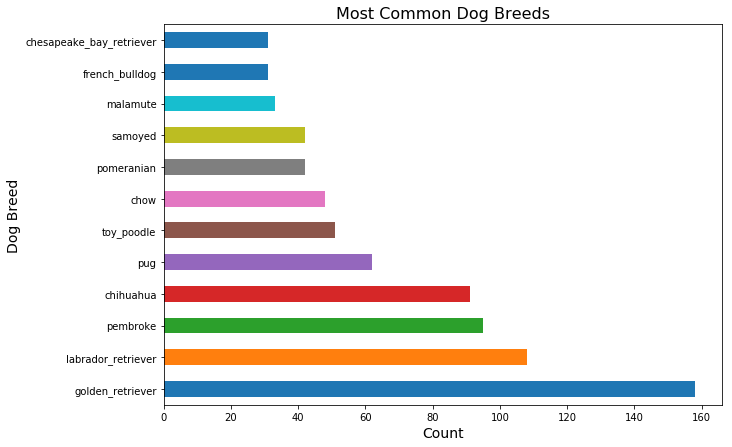

In [57]:
#Plot top 12 common breeds
df_clean[df_clean['breed']!='unidentifiable']['breed'].value_counts()[:12].plot(kind='barh', figsize = (10,7))
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Dog Breed', fontsize = 14)
plt.title('Most Common Dog Breeds', fontsize = 16);

#### Results

We first look at the count of the first 25 most common dog breeds. We see that more than 300 tweets were classified as unidentifiable, which is about almost 2 times more than the first actual dog breed. This could be that the image predictions has misclassified many of the images as not dogs. This seems more likely especially considering that the data comes from an image predictor code which could have made significant mistakes.

We next plotted the 12 most common (actual) dog breeds in a bar chart. We see that according to this data, the most common dog breed in the tweets was the golden retriever with over 150 tweets of the dog breed. The next four most common breeds, in descending order, were the labrador retrieve, the pembrooke (corgi), chihuahua, and the pug.

However, we should again be careful concluding too much from that data since we are relying on the image prediction code to inform us of the dog breed. It is possible that certain dog breeds were harder to determine by the prediction code and should acutally be higher in the list. In future investigations, the effectiveness of the image prediction data could be tested more throughly to ensure this data accurately reflects the different dog breeds.

#### Insight 3 : Most popular Dog Breeds

#### Define

Find the most popular dog breeds based on the favorites and retweet count

#### Code

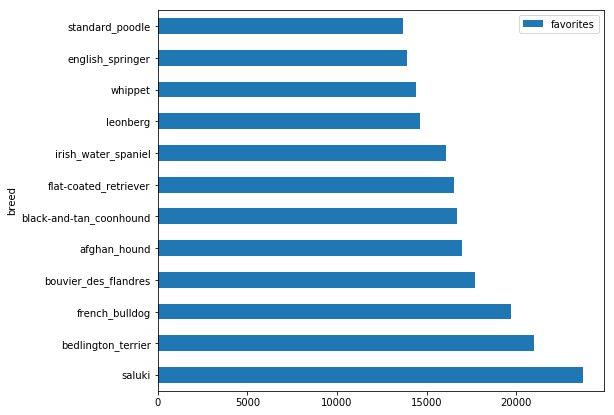

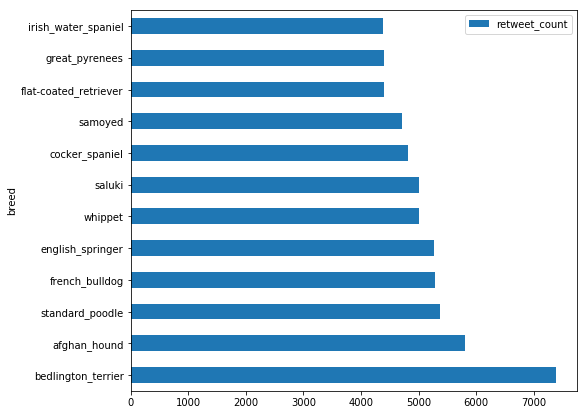

In [62]:
#Most popular Breeds
def popular_breeds(factor):
    return df_clean.groupby('breed')[['favorites','retweet_count']].mean()[[factor]].sort_values(factor,ascending = False)[:12].plot(kind='barh', figsize = (8,7))

popular_breeds('favorites')
popular_breeds('retweet_count');

#### Results

we averaged the retweets and favorites for each breed and plotted the highest 12 breeds for each factor. We can observe that only `French Bulldog` appears to be present in the above two charts as well as the most common dog breeds chart. This means that most of the common dog breeds does not have higher favorites and retweets. This makes sense that most people favorite and retweet when they see a dog breed which is not very common.

We can also notice that several breeds are present in both the charts which illustrate the positive correlation relationship between the favorites and retweets. Among those breeds which are present in both the charts `Bedlington Terrier` has got the 1st position based on retweets and got 2nd position based on favorites. people liked it the most and also retweeted it since they could see this breed rarely.